[  0.          36.36363636  72.72727273 109.09090909 145.45454545
 181.81818182 218.18181818 254.54545455 290.90909091 327.27272727
 363.63636364 400.        ]
[1.6        1.72727273 1.85454545 1.98181818 2.10909091 2.23636364
 2.36363636 2.49090909 2.61818182 2.74545455 2.87272727 3.        ]
0
1
2
0.06719483377484979 36.36363636363637 1.8545454545454545
0.08989708429726352 72.72727272727273 1.8545454545454545
0.10443862133238331 109.0909090909091 1.8545454545454545
0.1164901863983312 145.45454545454547 1.8545454545454545
0.12504729294643105 181.81818181818184 1.8545454545454545
0.1328195525984025 218.1818181818182 1.8545454545454545
0.13963080662874483 254.54545454545456 1.8545454545454545
0.14502566121983038 290.90909090909093 1.8545454545454545
0.14956201929484148 327.2727272727273 1.8545454545454545
0.15350359065416475 363.6363636363637 1.8545454545454545
0.15621584382687678 400.0 1.8545454545454545
3
0.08279223685850304 36.36363636363637 1.981818181818182
0.11153371958252606 72.7

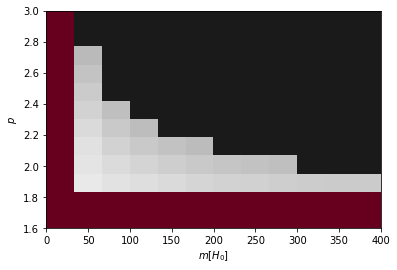

In [3]:
import sys
sys.path.append("..")

from stability_class import MultiFieldDarkEnergy
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

params = {
    'Omega_M_0': 0.3,
    'Omega_R_0': 6e-5,
    'V0': 2.15,
    'm': 10,
    'r0': 7*1e-4,
    'alpha': 2/2.186*1e-3,
    'x_p_init': 0.0,
    'x_t_init': 0.0,
    'y_1_init': 1e-5,
    'p': 2,
    'r_init_multiplier': 1,
    'cosmo_constant': 0,
}

cur_time = Polygon([(-1.05, 0.65), (-0.95, 0.75), (-0.95, 0.65), (-1.05, 0.75)])

length = 12
list_accepted = np.zeros((length, length))

p_range = np.linspace(1.6, 3, length)
m_range = np.linspace(0, 400, length)
print(m_range)
print(p_range)
colors = ['red', 'blue']
plt.figure()
for i, p in enumerate(p_range):
    print(i)
    for j, m in enumerate(m_range):
        params['p'] = p
        params['m'] = m
        c = MultiFieldDarkEnergy(metric='r_p', potential='exp_spinning', params=params, N_min = 0, N_max = 9, gamma=1)
        c.run_background_eq_of_motion()
        #c.plot_swampland_bound()
        field_derivative, delta_phi = c.get_field_derivative()
        size = len(c.get_eq_of_state())
        w = c.get_eq_of_state()
        omega = c.get_omega_phi()
        N = c.sol['t']
        cur_param = 0.5
        if min(c.get_de_sitter_bound()) < 0.5:
            cur_param = 0
            #print(p, m)
            #print('De Sitter violated', min(c.get_de_sitter_bound()))
        else:
            for k in range(size):
                point = Point(w[k], omega[k])
                if cur_time.contains(point):
                    # This solution has once been in omega=0.7 w=-1
                    #print('H:', c.get_H()[k])
                    cur = np.trapz(np.sqrt(3)*np.sqrt((1+w[:k])*omega[:k]), N[:k])
                    # cur = delta phi at omega=0.7 w=-1
                    cur_param = 0.5 + cur
                    print(cur, m, p)
                    if cur > 1:
                        cur_param= 1
                        print
                    break
                elif k == size-1:
                    # This solution has NEVER been in omega=0.7 w=-1
                    cur_param = 1
        if omega[size-1] < 0.9 and w[size-1] < -0.8:
            cur_param=-1        
        list_accepted[i, j] = cur_param
        #if cur_param == 1:
        #    print('Last eq of state:', w[size-1])
        #print(cur_param, p, m)


plt.xlabel(r'$m [H_0]$')
plt.ylabel(r'$p$')
plt.imshow(list_accepted, origin = 'lower', extent=[np.amin(m_range), np.amax(m_range), np.amin(p_range), np.amax(p_range)], aspect='auto',cmap='RdGy')
#plt.colorbar()

#plt.savefig('img/test.pdf', bbox_inches = 'tight')

plt.show()